# Point 1: Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import time

# Point 2: Load MNIST dataset

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target'].astype(int)

# Reduce dataset for speed (use 5000 samples)
X, y = X[:5000], y[:5000]

# Point 3: Train-test split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Point 4: Scale features

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Point 5: Custom k-NN implementation

In [5]:
class MyKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            distances = np.linalg.norm(self.X_train - test_point, axis=1)
            k_idx = np.argsort(distances)[:self.k]
            k_labels = [self.y_train[i] for i in k_idx]
            label = Counter(k_labels).most_common(1)[0][0]
            predictions.append(label)
        return np.array(predictions)

# Point 6: Fit and predict

In [6]:
knn = MyKNN(k=3)
start = time.time()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
knn_time = time.time() - start

# Point 7: Accuracy

In [7]:
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Custom k-NN Accuracy: {acc_knn:.4f} (Time: {knn_time:.2f} sec)")

Custom k-NN Accuracy: 0.9020 (Time: 21.11 sec)


# Point 8: Import TensorFlow and prepare data

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Point 9: Reshape for CNN (28x28 images)

In [9]:
X = X.reshape(-1, 28, 28, 1)
X = X / 255.0  # Normalize pixel values

# Point 10: Train-test split again for CNN

In [10]:
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X, y, test_size=0.2, random_state=42)


# Point 11: Build CNN

In [11]:
cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Point 12: Train model

In [12]:
start = time.time()
history = cnn.fit(X_train_cnn, y_train_cnn, epochs=5, validation_split=0.1, verbose=2)
cnn_time = time.time() - start

Epoch 1/5
113/113 - 5s - 43ms/step - accuracy: 0.7422 - loss: 0.8324 - val_accuracy: 0.9125 - val_loss: 0.3126
Epoch 2/5
113/113 - 3s - 27ms/step - accuracy: 0.9447 - loss: 0.1921 - val_accuracy: 0.9350 - val_loss: 0.2243
Epoch 3/5
113/113 - 4s - 36ms/step - accuracy: 0.9619 - loss: 0.1220 - val_accuracy: 0.9575 - val_loss: 0.1882
Epoch 4/5
113/113 - 3s - 26ms/step - accuracy: 0.9736 - loss: 0.0894 - val_accuracy: 0.9575 - val_loss: 0.1907
Epoch 5/5
113/113 - 3s - 26ms/step - accuracy: 0.9803 - loss: 0.0672 - val_accuracy: 0.9600 - val_loss: 0.1435


# Point 13: Evaluate model

In [13]:
cnn_loss, cnn_acc = cnn.evaluate(X_test_cnn, y_test_cnn)
print(f"CNN Accuracy: {cnn_acc:.4f} (Time: {cnn_time:.2f} sec)")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9694 - loss: 0.1092
CNN Accuracy: 0.9700 (Time: 20.16 sec)


# Point 14: Accuracy comparison

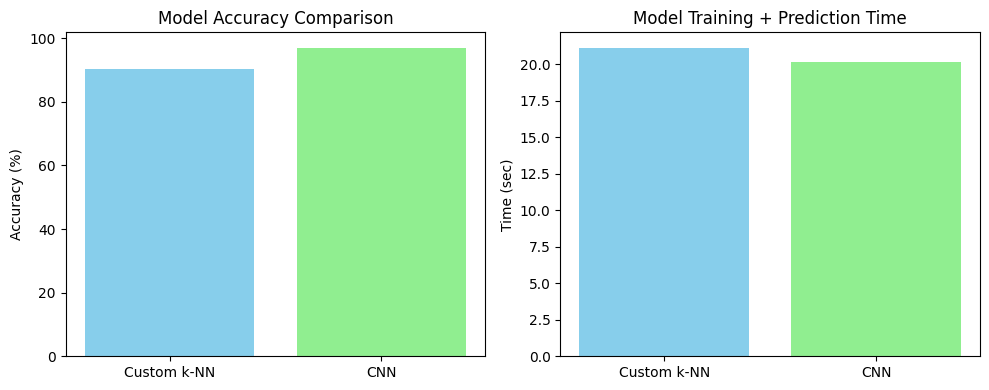

In [14]:
models = ['Custom k-NN', 'CNN']
accuracies = [acc_knn * 100, cnn_acc * 100]
times = [knn_time, cnn_time]

plt.figure(figsize=(10, 4))

# Accuracy bar plot
plt.subplot(1, 2, 1)
plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")

# Time bar plot
plt.subplot(1, 2, 2)
plt.bar(models, times, color=['skyblue', 'lightgreen'])
plt.ylabel("Time (sec)")
plt.title("Model Training + Prediction Time")

plt.tight_layout()
plt.show()